### Analyze This 2019

In [1]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
#url_train = 'Dataset/development_dataset.csv'
url_train = 'itrImputed.csv' #traing dataset
#url_dict = './Dataset/Data_Dictionary.xlsx' #data dictionary
url_lead = 'itrImputedlead.csv' 
#url_lead = 'Dataset/leaderboard_dataset.csv'

In [68]:
## making dataframe
#df_raw = pd.read_csv(url_raw)
df_train = pd.read_csv(url_train)
#df_dict = pd.read_excel(url_dict)
df_lead = pd.read_csv(url_lead)
#df_lead_raw = pd.read_csv(url_lead_raw)

In [69]:
df_train = df_train.replace(to_replace = '.', value =np.nan)
df_lead = df_lead.replace(to_replace = '.', value =np.nan)

In [70]:
#df_train = df_train.iloc[:,1:]
df_train.head()

,Unnamed: 0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,63.699984,...,100.083403,1.000000,1.000000,1.000000,1.540594,859.508022,1.0,0.0,100.104991,Low
1,1,2,911.764706,0.027778,238.761364,611.574748,8.181818,1.344479,198.600020,22.086661,...,15.012510,11.050880,1.000000,11.776264,1.614613,869.487400,0.0,1.0,146.654045,High
2,2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.890461,...,210.175146,10.000000,1.000000,10.000000,1.044599,728.127337,0.0,0.0,98.249570,Medium
3,3,4,892.941177,0.782091,233.617604,638.076431,9.090909,0.820218,197.355744,4.363431,...,134.651887,9.612582,1.000000,10.163069,1.145729,929.978034,1.0,0.0,140.862306,Low
4,4,5,914.117647,0.083333,196.574005,626.514988,5.181818,1.372928,198.790477,85.938202,...,210.175146,11.549667,1.258089,12.494794,1.558341,720.948316,1.0,0.0,101.268503,High


In [71]:
lead_key = df_lead['VAR1'].tolist()
#print(lead_key)

In [72]:
#df_lead = df_lead.iloc[:,1:]
df_lead.head()

,Unnamed: 0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
0,0,1,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,197.500187,79.841411,...,9.433609,40.033361,10.000000,2.0,10.000000,1.212784,1000.000000,1.0,0.0,48.099828
1,1,2,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,197.016843,253.896073,...,10.144612,-52.920376,5.666667,1.0,7.600000,1.004907,992.550000,0.0,0.0,104.018933
2,2,3,955.294118,0.055556,119.194565,611.574748,6.363636,0.918652,197.660051,22.086661,...,0.583494,132.085648,6.000000,1.0,6.000000,1.157115,810.124901,1.0,1.0,120.586919
3,3,4,831.764706,0.111111,250.000000,617.740617,6.545455,2.383924,200.526288,9.139058,...,7.209404,88.819201,11.089148,3.0,11.865819,2.350858,824.198921,0.0,1.0,168.592083
4,4,5,957.647059,0.166667,119.582615,623.426802,15.127501,0.711240,197.151458,5.013668,...,0.255712,125.551716,13.333333,1.0,13.333333,1.171551,782.887923,0.0,1.0,109.204819


### Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
#X_lead = sc_X.transform(X_lead)
#X_oth = sc_X.fit_transform(X_oth)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [74]:
def percentile_linear(columns):
    size = len(columns)-1
    y = columns.rank(method='min').apply(lambda x: (x-1)/size)
    return y

In [75]:
# for i in df_train.columns[1:-1]:
#     df_train[i] = percentile_linear(df_train[i])

In [76]:
# for i in df_lead.columns[1:]:
#     df_lead[i] = percentile_linear(df_lead[i])

In [77]:
#df_train.columns

In [78]:
#df_lead.head()

#### Dropping features

In [79]:
drop_list1 = ['VAR5','VAR11','VAR17']
drop_list2 = ['VAR19','VAR18']
drop_list3 = ['VAR14'] #9

In [80]:
df_train = df_train.drop(drop_list2,axis=1)
df_lead = df_lead.drop(drop_list2,axis=1)

In [81]:
df_train.head()

,Unnamed: 0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR20,VAR21
0,0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,63.699984,58.632548,0.279273,100.083403,1.000000,1.000000,1.000000,1.540594,859.508022,100.104991,Low
1,1,2,911.764706,0.027778,238.761364,611.574748,8.181818,1.344479,198.600020,22.086661,49.380972,5.432857,15.012510,11.050880,1.000000,11.776264,1.614613,869.487400,146.654045,High
2,2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.890461,58.632548,0.453212,210.175146,10.000000,1.000000,10.000000,1.044599,728.127337,98.249570,Medium
3,3,4,892.941177,0.782091,233.617604,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,4.643820,134.651887,9.612582,1.000000,10.163069,1.145729,929.978034,140.862306,Low
4,4,5,914.117647,0.083333,196.574005,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,5.434610,210.175146,11.549667,1.258089,12.494794,1.558341,720.948316,101.268503,High


In [82]:
df_lead.head()

,Unnamed: 0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR20
0,0,1,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,197.500187,79.841411,58.632548,9.433609,40.033361,10.000000,2.0,10.000000,1.212784,1000.000000,48.099828
1,1,2,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,197.016843,253.896073,58.632548,10.144612,-52.920376,5.666667,1.0,7.600000,1.004907,992.550000,104.018933
2,2,3,955.294118,0.055556,119.194565,611.574748,6.363636,0.918652,197.660051,22.086661,51.834605,0.583494,132.085648,6.000000,1.0,6.000000,1.157115,810.124901,120.586919
3,3,4,831.764706,0.111111,250.000000,617.740617,6.545455,2.383924,200.526288,9.139058,48.539365,7.209404,88.819201,11.089148,3.0,11.865819,2.350858,824.198921,168.592083
4,4,5,957.647059,0.166667,119.582615,623.426802,15.127501,0.711240,197.151458,5.013668,49.379748,0.255712,125.551716,13.333333,1.0,13.333333,1.171551,782.887923,109.204819


### Label Encoding

In [83]:
X = df_train.iloc[:, 1:-1].values
y = df_train.iloc[:, -1].values

X_lead = df_lead.iloc[:, 1:].values
y

array(['Low', 'High', 'Medium', ..., 'Low', 'Low', 'High'], dtype=object)

In [84]:
# label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
#X[:, 11] = labelencoder_X.fit_transform(X[:, 11])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [85]:
y

array([1, 0, 2, ..., 1, 1, 0])

### Class Imbalance

Text(0, 0.5, 'Frequency')

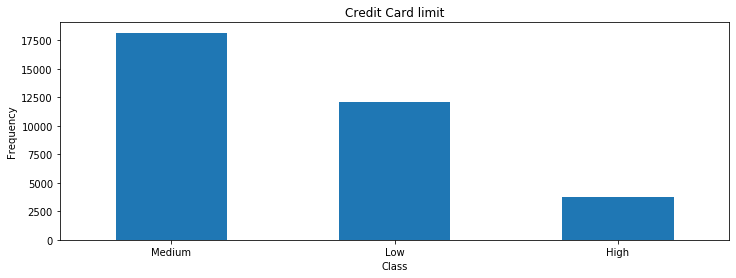

In [86]:
count_classes = pd.value_counts(df_train['VAR21'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Credit Card limit")
#plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [87]:
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [88]:
# Implementing Oversampling for Handling Imbalanced 
# smk = SMOTETomek(random_state=42)
# X_res,y_res=smk.fit_sample(X,y)

In [89]:
#X_res.shape,y_res.shape

In [90]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
#print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({2: 18172, 1: 12081, 0: 3747})


### Splitting

In [91]:
# split data into train and test sets
seed = 42
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [92]:
#X_lead = sc_X.transform(X_lead)
X_train.shape

(25500, 18)

# Fitting Model & Evaluation

In [93]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Training simple XGB Classifier

In [94]:
# fit model no training data
modelxgb = XGBClassifier()

In [95]:
modelxgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [96]:
# make predictions for test data
y_pred = modelxgb.predict(X_test)
predictions = [round(value) for value in y_pred]

In [97]:
y_pred

array([1, 1, 2, ..., 1, 2, 2])

In [98]:
#predictions

In [99]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.32%


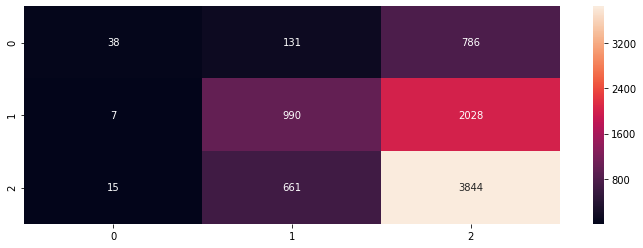

In [100]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

### Training XGB Classifier with K-Fold CV

In [101]:
modelxgbkfold = XGBClassifier()

In [102]:
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(modelxgbkfold, X_train, y_train, cv=kfold, scoring='accuracy')

In [103]:
result.mean()

0.5759607843137255

#### Leaderboard Prediction

In [104]:
y_lead = modelxgb.predict(X_lead)

In [105]:
y_lead_ = y_lead.tolist()

In [106]:
len(lead_key)

10000

In [107]:
len(y_lead_)

10000

In [108]:
ylead = labelencoder_y.inverse_transform(y_lead_)

In [109]:
ylead

array(['Medium', 'Low', 'Medium', ..., 'Medium', 'Medium', 'Low'],
      dtype=object)

Text(0, 0.5, 'Frequency')

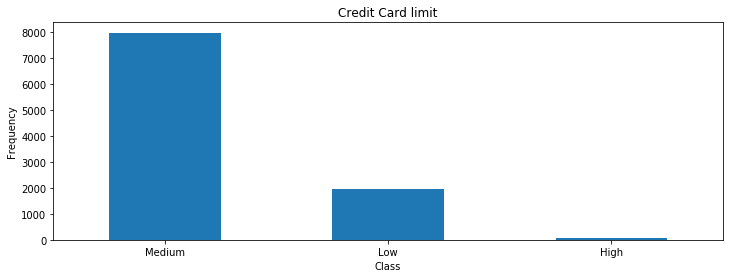

In [110]:
n_count_classes = pd.value_counts(ylead, sort = True)
n_count_classes.plot(kind = 'bar', rot=0)
plt.title("Credit Card limit")
#plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [111]:
dfxyz = pd.DataFrame(ylead,lead_key)

In [112]:
dfxyz.head()

,0
1,Medium
2,Low
3,Medium
4,Low
5,Medium


In [113]:
#dfxyz.to_csv('Anonymous_IITRoorkee_9.csv',header=False)

#### Feature Importance and Selection

In [114]:
print(modelxgb.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.02156882 0.12371518 0.11708082 0.11729465 0.04163072 0.05947127
 0.04869382 0.03730383 0.0250985  0.03432956 0.03149573 0.03565318
 0.05777531 0.03311009 0.03394119 0.04670125 0.03440943 0.10072666]


In [115]:
col = df_train.columns[1:-1]
len(col)

18

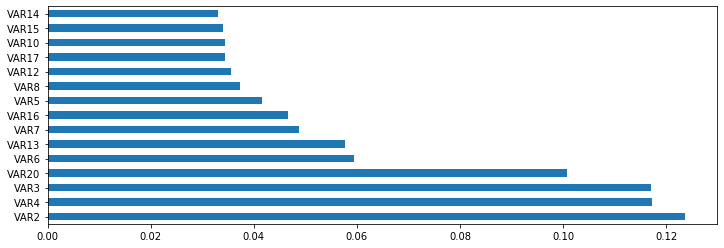

In [116]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelxgb.feature_importances_, index=col)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### Training customized XGB Classifier

In [117]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

target = 'VAR21'
IDcol = 'VAR1'

In [118]:
train = df_train
train.head()

,Unnamed: 0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR20,VAR21
0,0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,63.699984,58.632548,0.279273,100.083403,1.000000,1.000000,1.000000,1.540594,859.508022,100.104991,Low
1,1,2,911.764706,0.027778,238.761364,611.574748,8.181818,1.344479,198.600020,22.086661,49.380972,5.432857,15.012510,11.050880,1.000000,11.776264,1.614613,869.487400,146.654045,High
2,2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.890461,58.632548,0.453212,210.175146,10.000000,1.000000,10.000000,1.044599,728.127337,98.249570,Medium
3,3,4,892.941177,0.782091,233.617604,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,4.643820,134.651887,9.612582,1.000000,10.163069,1.145729,929.978034,140.862306,Low
4,4,5,914.117647,0.083333,196.574005,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,5.434610,210.175146,11.549667,1.258089,12.494794,1.558341,720.948316,101.268503,High


In [119]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y1 = LabelEncoder()
#labelencoder_x1 = LabelEncoder()
train.iloc[:,-1] = labelencoder_y1.fit_transform(train.iloc[:,-1].values)

In [120]:
train.head()

,Unnamed: 0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR20,VAR21
0,0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,63.699984,58.632548,0.279273,100.083403,1.000000,1.000000,1.000000,1.540594,859.508022,100.104991,1
1,1,2,911.764706,0.027778,238.761364,611.574748,8.181818,1.344479,198.600020,22.086661,49.380972,5.432857,15.012510,11.050880,1.000000,11.776264,1.614613,869.487400,146.654045,0
2,2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.890461,58.632548,0.453212,210.175146,10.000000,1.000000,10.000000,1.044599,728.127337,98.249570,2
3,3,4,892.941177,0.782091,233.617604,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,4.643820,134.651887,9.612582,1.000000,10.163069,1.145729,929.978034,140.862306,1
4,4,5,914.117647,0.083333,196.574005,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,5.434610,210.175146,11.549667,1.258089,12.494794,1.558341,720.948316,101.268503,0


In [121]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 3
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    #feat_imp = pd.Series(alg.feature_importances_, index = predictors)
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [126]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1500,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

#predictors


Model Report
Accuracy : 0.6191


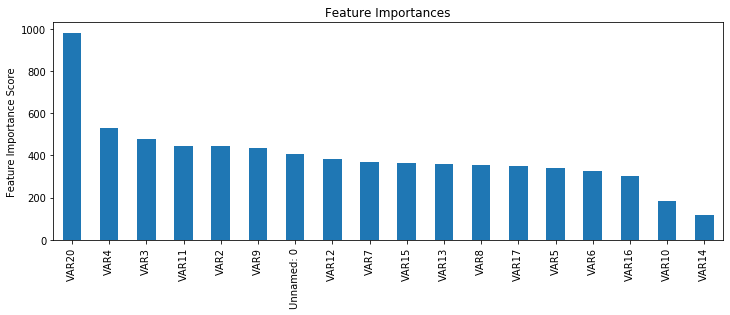

In [127]:
modelfit(xgb1, train, predictors)

#### Leaderboard Prediction (Tuned XGBoost)

In [128]:
lead = df_lead
lead_predictors = [x for x in lead.columns if x not in [IDcol]]
#lead_predictors

In [129]:
lead_predictions = xgb1.predict(lead[predictors])

In [130]:
dlead = lead_predictions.tolist()
len(lead_key), len(dlead)

(10000, 10000)

In [131]:
dylead = labelencoder_y1.inverse_transform(lead_predictions)
dylead

array(['Medium', 'Low', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

Text(0, 0.5, 'Frequency')

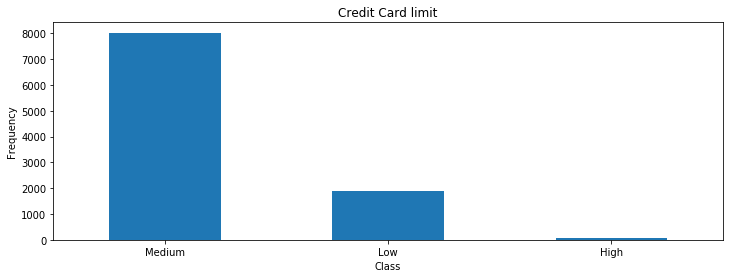

In [132]:
n_count_classes = pd.value_counts(dylead, sort = True)
n_count_classes.plot(kind = 'bar', rot=0)
plt.title("Credit Card limit")
#plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

#### Grid Search

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1_micro',n_jobs=4,iid=False, cv=5)

gsearch1.fit(train[predictors],train[target])


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 5}, 0.5784411921328253)

In [ ]:
param_test2 = {
 'max_depth':[5,6,7],
 'min_child_weight':[3,4,5,6]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1_micro',n_jobs=4,iid=False, cv=5)

gsearch2.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=2,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': [5, 6, 7],
                         'min_child_weight': [3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5, 'min_child_weight': 5}, 0.5784411921328253)

In [ ]:
param_test6 = {
 'subsample':[0.7,0.8,0.9],
 'colsample_bytree':[0.7,0.8,3,0.9]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=1000, max_depth=8,
 min_child_weight=2, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='f1_micro',n_jobs=4,iid=False, cv=5)

gsearch6.fit(train[predictors],train[target])